<h1>Table of Contents (Clickable in sidebar)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Research-Question" data-toc-modified-id="Research-Question-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Research Question</a></span></li><li><span><a href="#Libraries-and-modules" data-toc-modified-id="Libraries-and-modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries and modules</a></span></li><li><span><a href="#Load-main-'stocks'-df-and-begin-EDA" data-toc-modified-id="Load-main-'stocks'-df-and-begin-EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load main 'stocks' df and begin EDA</a></span><ul class="toc-item"><li><span><a href="#df.head()" data-toc-modified-id="df.head()-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>df.head()</a></span></li><li><span><a href="#df-shape-is--small-(1708,-14)" data-toc-modified-id="df-shape-is--small-(1708,-14)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>df shape is  small (1708, 14)</a></span></li><li><span><a href="#df.dtypes" data-toc-modified-id="df.dtypes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>df.dtypes</a></span></li><li><span><a href="#The-df.nunique()-method-reveals--following-2-issues-in-categorical-data:" data-toc-modified-id="The-df.nunique()-method-reveals--following-2-issues-in-categorical-data:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>The df.nunique() method reveals  following 2 issues in categorical data:</a></span></li><li><span><a href="#'Flag-Description'" data-toc-modified-id="'Flag-Description'-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>'Flag Description'</a></span></li></ul></li><li><span><a href="#Why-do-we-have-one-more-area-than-expected?" data-toc-modified-id="Why-do-we-have-one-more-area-than-expected?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Why do we have one more area than expected?</a></span></li><li><span><a href="#Investigate-historical--cattle-stock-reporting-in-the-BENELUX-and---BELUX-union-areas" data-toc-modified-id="Investigate-historical--cattle-stock-reporting-in-the-BENELUX-and---BELUX-union-areas-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Investigate historical  cattle stock reporting in the BENELUX and   BELUX union areas</a></span></li><li><span><a href="#Revise-a-research-question-to-more-recent-years-of-2000-2021" data-toc-modified-id="Revise-a-research-question-to-more-recent-years-of-2000-2021-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Revise a research question to more recent years of 2000-2021</a></span></li><li><span><a href="#Update-the-time-frame-of-our-main-Dataframe-df" data-toc-modified-id="Update-the-time-frame-of-our-main-Dataframe-df-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Update the time frame of our main Dataframe df</a></span></li><li><span><a href="#Eliminate-the-Belgium-Luxembourg" data-toc-modified-id="Eliminate-the-Belgium-Luxembourg-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Eliminate the Belgium-Luxembourg</a></span></li><li><span><a href="#Lack-of-estimated-and-unofficial-reporting" data-toc-modified-id="Lack-of-estimated-and-unofficial-reporting-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Lack of estimated and unofficial reporting</a></span></li><li><span><a href="#The-devil-is-in-the-dtypes!" data-toc-modified-id="The-devil-is-in-the-dtypes!-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>The devil is in the dtypes!</a></span></li><li><span><a href="#The-Cattle-Stock---cast-them-as-32-bit-integers" data-toc-modified-id="The-Cattle-Stock---cast-them-as-32-bit-integers-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>The Cattle Stock   cast them as 32-bit integers</a></span></li><li><span><a href="#This-Jupyter-Notebook-has-focussed-on-cleaning-our-target-variable" data-toc-modified-id="This-Jupyter-Notebook-has-focussed-on-cleaning-our-target-variable-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>This Jupyter Notebook has focussed on cleaning our target variable</a></span></li><li><span><a href="#We-finished-up-with-..." data-toc-modified-id="We-finished-up-with-...-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>We finished up with ...</a></span></li><li><span><a href="#Run-notebook-02_data_wrangling_beef.jpynb-from-the--root-directory-next." data-toc-modified-id="Run-notebook-02_data_wrangling_beef.jpynb-from-the--root-directory-next.-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Run notebook 02_data_wrangling_beef.jpynb from the  root directory next.</a></span></li></ul></div>

# Exploratory Data Analysis EU Beef
## Research Question
How has Ireland's beef sector performed compared to the EU 27 countries from 1961 to 2021, and can we forecast future prices using historical data? Additionally, what can we learn from sentiment analysis of the beef industry during this time period?
## Libraries and modules

In [1]:

### Data Manipulation and Analysis
import csv
import pandas as pd
import numpy as np
import fancyimpute
import missingno as msno
from functools import partial, reduce

### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg


### Text Processing
import html
import re


### File System and OS
import glob
import os

### Date and Time
import datetime
import time

### Data Presentation
from tabulate import tabulate
from IPython.display import HTML, Image, display

### Data Types
from typing import Dict, List, Tuple


## Load main 'stocks' df and begin EDA

### df.head() 
Direct look at first 5 rows
###  df shape is  small (1708, 14)
The shape  of rows and columns, is relatively small (1708, 14).

1708 is enough rows for training without overfitting  while small enough for simple and  interpretable model. Nevertheless this will likely be reduced. 

The 14 columns wont all be features available for the model as only most relevant and informative features  will be kept and irrelevant or redundant ones will be dropped.

### df.dtypes 

We will change the Year column data  type of a  in a Pandas DataFrame from int64 to int32 using the astype() method

We will change the 'Value'column type from              float64 to int32

### The df.nunique() method reveals  following 2 issues in categorical data:

1. Flag Description 
- We have 1160		Estimated values
- and 1182 	Unofficial figure
- In the context of this data analysis, these "estimated value" and "unofficial figures" might have  significant impact on the accuracy and reliability of our conclusion. 
2. The European Union (EU) is a political and economic union of 27 member states and yet we have 28  unique values of Area. This is more pressing than the flag describtiopns and is investigated first.
### 'Flag Description' 
Apply .drop_duplicates()

61	NaN	NaN

1160	E	Estimated value

1182	T	Unofficial figure



In [2]:
"""
Become aquainted with data structure management system
"""
print(os.getcwd()) # working directory.
print(os.listdir('.')) #List current directory
print(os.listdir('data')) # Our source files from FAOSTAT are in 'data' folder
df = pd.read_csv('raw/stocks.csv') # read  stock CSV file  df
print(df.shape) # Inspect the dimensions of the dataset (number of rows and columns). (1708, 14)
print(df.dtypes)
#Check for missing values 
print(df.nunique()) #  We have 28  country/ regions repoorting and 61 years of data
df[['Flag', 'Flag Description']].drop_duplicates() 
missing_df=df.isnull().sum()
missing = missing_df.values  #NumPy array
missing_df.to_csv('clean/missing.csv', index=False)
np.save('clean/missing.npy', missing)
print(df.isnull().sum()) #  Check for missing values throughout df and shows 319 cases
df.head() #: returns the first few rows of the DataFrame indicating many fields may be invariant and reduntant

C:\Users\ronan\beef
['.git', '.ipynb_checkpoints', '01_eda_beef.ipynb', '02_data_wrangling_beef-20-16.ipynb', '02_data_wrangling_beef_glenside.ipynb', '02_dw_beef.ipynb', '02_ml_beef.ipynb', 'arch', 'beef.pdf', 'clean', 'cleanareas.csv', 'css', 'data', 'git', 'ignore', 'images', 'rain', 'raw', 'README.md', 'temperature', 'Untitled.ipynb', 'Untitled1.ipynb', 'Wrangling_Snippets.ipynb']
['arch', 'cattle_meat_import_export.csv', 'land_use_all_items_area_eu28.csv', 'pr_timeseries__IRL.csv', 'stocks.csv', 'tas_timeseries_IRL.csv', 'temperature_change.csv', 'temperature_sd.csv']
(1708, 14)
Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)       int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object
Dom

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,1961,1961,Head,2386761.0,A,Official figure
1,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,1962,1962,Head,2456557.0,A,Official figure
2,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,1963,1963,Head,2437123.0,A,Official figure
3,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,1964,1964,Head,2310667.0,A,Official figure
4,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,1965,1965,Head,2350269.0,A,Official figure


## Why do we have one more area than expected?
Belgium and Luxembourg used to act as an economic union called 'BELUX'
This extended at times to Belgium, the Netherlands, and Luxembourg collectively termedd  'Benelux' 


The unique() method returns an array of unique values in the order in which they appear in the original DataFrame column. In this case, the array contains all the unique values in the "Area" column.

After executing the statement, the resulting array is assigned to a variable called areasEu.


Belgium-Luxembourg started reporting beef stocks independently in 2000
As part of the BLEU,  1999. After 1999, they started reporting independently.
We zoom in on the df around 2000 and compare the three countries by plot with the Netherland s now acting as an exemplar of the rest of the coutries

In [3]:
# Define an 'areas'  array
areas = df['Area'].unique() #  one-dimensional NumPy array
# print the areas array
print(areas)
# Save the array to a file
np.save('clean/areas.npy', areas)
# Convert the 'areas' array to areas_df DataFrame 
areas_df = pd.DataFrame({'Area':areas})
areas_df.to_csv('cleanareas.csv')
# and take a look to discover BELUX anomoly
belux_df=df[df['Area'].isin(['Belgium-Luxembourg', 'Belgium', 'Luxembourg'])]
benelux_df = df[df['Area'].isin(['Belgium-Luxembourg', 'Belgium', 'Luxembourg', 'Netherlands'])]
benelux_df.sample(5) 

['Austria' 'Belgium' 'Belgium-Luxembourg' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'Poland' 'Portugal' 'Romania' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden']


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
143,QCL,Crops and livestock products,58,Belgium-Luxembourg,5111,Stocks,2111,Cattle,1982,1982,Head,3072000.0,A,Official figure
1269,QCL,Crops and livestock products,528,Netherlands,5111,Stocks,2111,Cattle,2010,2010,Head,3975190.0,A,Official figure
1132,QCL,Crops and livestock products,442,Luxembourg,5111,Stocks,2111,Cattle,1995,1995,NaN,NaN,NaN,NaN
75,QCL,Crops and livestock products,56,Belgium,5111,Stocks,2111,Cattle,1975,1975,NaN,NaN,NaN,NaN
1118,QCL,Crops and livestock products,442,Luxembourg,5111,Stocks,2111,Cattle,1981,1981,NaN,NaN,NaN,NaN



## Investigate historical  cattle stock reporting in the BENELUX and   BELUX union areas
We discovered above that there were 28 unique entries for "Area" despite there being only 27 EU countries. Further investigation beloe reveals that Belgium and Luxembourg reported economic data as one region but the Netherlands who also participated in an economic union with  Belgium and Luxembourg known collectively as Benelux reported cattle stock independantly as did all other 24 EU countries. To ensure a focussed investigation, we will filter the DataFrame to only include data from these three countries and use the pivot() method in pandas to reshape the DataFrame and compare reporting practice patterns between all three. The conclusion will be that: The  Netherlands reported cattle stock independently for all 61 years of our research interval, while Belgium 
and Luxembourg reported collectively as the Benelux region from 1961 to 1999 when they split and started reporting individually.

In [4]:
# Reshape the DataFrame with pivot()
beluxPivot_df = belux_df.pivot(index='Year', columns='Area', values='Value')
# Reshape the DataFrame with pivot()
beneluxPivot_df = benelux_df.pivot(index='Year', columns='Area', values='Value')
# Rename the columns of the pivot table
beluxPivot=beluxPivot_df.columns = ['{}_stock'.format(col.replace(' ', '_')) for col in beluxPivot_df.columns]
# Rename the columns of the pivot table
beneluxPivot=beneluxPivot_df.columns = ['{}_stock'.format(col.replace(' ', '_')) for col in beneluxPivot_df.columns]

In [5]:

# Write all 4 CSV file
beneluxPivot_df.to_csv('clean/beneluxPivot.csv', index=False)
beluxPivot_df.to_csv('clean/beluxPivot.csv', index=False)
np.save('clean/beneluxPivot.npy', beneluxPivot)
beneluxPivot_df.to_csv('clean/beneluxPivot.csv', index=False)

In [6]:
print(os.listdir('clean'))
beneluxPivot_df

['arch', 'areas.npy', 'AreasEU.csv', 'beluxPivot.csv', 'beneluxPivot.csv', 'beneluxPivot.npy', 'benelux_pivot.csv', 'cattle_stocks.csv', 'missing.csv', 'missing.npy', 'stock.csv', 'stocks.csv']


,Belgium_stock,Belgium-Luxembourg_stock,Luxembourg_stock,Netherlands_stock
Year,,,,
1961,NaN,2684120.0,NaN,3622588.0
1962,NaN,2798130.0,NaN,3816942.0
1963,NaN,2847478.0,NaN,3695185.0
1964,NaN,2641407.0,NaN,3567379.0
1965,NaN,2685510.0,NaN,3750629.0
...,...,...,...,...
2017,2385988.0,NaN,202281.0,4030000.0
2018,2398090.0,NaN,194390.0,3690000.0
2019,2373100.0,NaN,192100.0,3721000.0


In [7]:
benelux_1997_2002_df = beneluxPivot_df.loc['1997':'2003']
benelux_1997_2002_df.head(6)

,Belgium_stock,Belgium-Luxembourg_stock,Luxembourg_stock,Netherlands_stock
Year,,,,
1997,NaN,3280000.0,NaN,4411000.0
1998,NaN,3184000.0,NaN,4283000.0
1999,NaN,3395000.0,NaN,4206000.0
2000,3041560.0,NaN,205072.0,4070000.0
2001,3037760.0,NaN,205193.0,4047000.0
2002,2891260.0,NaN,197257.0,3858000.0


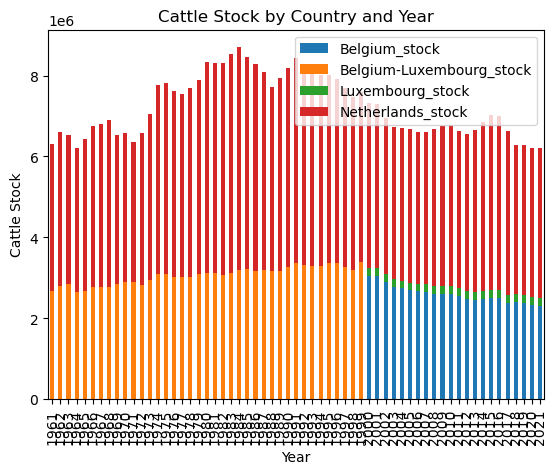

In [8]:
"""This block of code creates a stacked bar chart using Matplotlib 
to visualize the cattle stock in the Benelux region by country and year."""

fig, ax = plt.subplots()

beneluxPivot_df.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Cattle Stock')
ax.set_title('Cattle Stock by Country and Year')

plt.show()

## Revise a research question to more recent years of 2000-2021

We  update the time frame of the researh  to 2000 to 2021 completely mitihgating against any need to fill missing data in Luxemburg and Belbium to approximate shares of the BELUX stock reports for these years.

How has Ireland's beef sector performed compared to the EU 27 countries since 2000, and can we forecast future prices using this historical data? Additionally, what can we learn from sentiment analysis of the beef industry during this time period? By focusing on data from 2000 onwards, we can better capture the current state of the beef industry and make more relevant predictions about future trends. At the end of 1999, the Benelux union ceased to report beef stock data as a single entity, as each member country began reporting its data individually. This change reflected the increasing economic development and growth of the individual countries within the union. This not only created the data reason for us to only researh the 21st era but it also provides a fiscal reason for the refining of the researh question.

## Update the time frame of our main Dataframe df
Apart from solving the BELUX data cleaning problem recasting the research question to 2000-2021 acknowledges
 that 
farming in the 20th centuary was significantly different than from now so dropping this old data makes the data we keep more  relevant  for modelling current multivariate trends and predicting future trends along with suggested mittigations.



By fixing our **BELUX** problem the estimation and unoffial stock reportig flags hae also dissapeared and we have killed two birds with the one stone so to speak! We will also do some relabelling and reduce dimesionality based on nvariant data.

The df.nunique() method to identify invariant data
The df.nunique() method returns the number of unique values in each column of our beef stocks data. This isuseful for identifying columns that have only one value like the **Domain** which is **Crops and livestock products**. All of this invariant data is redundant data that can be dropped to reduce the size of the DataFrame or improve the performance of data analyses. Note the Element header had **Stock** as every value and this was useful in that we used it to rename the Value field. It no longer of any use and gets the chop. selecting a subset of columns from a Pandas DataFrame. Selecting a  relatively small subset of columns is useful when you are keeping less than half of the fields.



In [9]:
"""Creats a new DataFrame with Year>=2000 and keeps old  familiar name df"""
df = df[df['Year'] >= 2000]
df = df.loc[df['Area'] != 'Belgium-Luxembourg'] #Exclude 'Belgium-Luxembourg' from the 'Area' column in df.
df = df.rename(columns={'Value': 'Stock', 'Area': 'Country'}) #Renamed 'Value' column to 'Stocks' and Area column to Country.
print(df.shape)
#Check the revised df for  missing values 
df.nunique() #  The df.nunique() method reveals 27 areas

(594, 14)


Domain Code           1
Domain                1
Area Code (M49)      27
Country              27
Element Code          1
Element               1
Item Code (CPC)       1
Item                  1
Year Code            22
Year                 22
Unit                  1
Stock               592
Flag                  1
Flag Description      1
dtype: int64

In [10]:
df.head() # Check that  filtering and renaming worked correctly

,Domain Code,Domain,Area Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Stock,Flag,Flag Description
39,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2000,2000,Head,2152811.0,A,Official figure
40,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2001,2001,Head,2155447.0,A,Official figure
41,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2002,2002,Head,2118454.0,A,Official figure
42,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2003,2003,Head,2066942.0,A,Official figure
43,QCL,Crops and livestock products,40,Austria,5111,Stocks,2111,Cattle,2004,2004,Head,2052033.0,A,Official figure


In [11]:
df = df[["Country", "Year", "Stock", "Flag", "Flag Description"]] # Easier to stipulate what we keep 

In [12]:
df.shape# returns the dimensions of the DataFrame as (1708, 14)
df.tail()

,Country,Year,Stock,Flag,Flag Description
1703,Sweden,2017,1448590.0,A,Official figure
1704,Sweden,2018,1435450.0,A,Official figure
1705,Sweden,2019,1404670.0,A,Official figure
1706,Sweden,2020,1390960.0,A,Official figure
1707,Sweden,2021,1389890.0,A,Official figure


In [13]:
print(df.dtypes)

Country              object
Year                  int64
Stock               float64
Flag                 object
Flag Description     object
dtype: object


## Lack of estimated and unofficial reporting
Lack of estimated and unofficial reporting makes the Flag and  Flag Description field reduntant so we drop them

In [14]:
flag_df = df[['Flag', 'Flag Description']].drop_duplicates()
flag_df # Unofficial and estimated reports were illiminated with other interventions!

,Flag,Flag Description
39,A,Official figure


In [15]:
df.dtypes

Country              object
Year                  int64
Stock               float64
Flag                 object
Flag Description     object
dtype: object

## The devil is in the dtypes!

While there is a somewhat academic exposition into the importance of approriate use of the Int type for discreet values $\mathbb{Z} $  and the floating type to represent real numbers  $\mathbb{R}$ suffice to say here that integers are for counting and as well as counting sheep we count cattle and that is the end of it. Bad things can  happen when floating points are used for discreet values and even if they don't we slow down our modelling.

Also int64 can represent a much larger range of values than int32, but it also requires more memory so we will recast the Year type from INT64 to INT32.  If we are still farning in two billion years in the year  2,147,483,647  someone or some bovine  can cast it back up to INT64 depending on evolution and who is in charge!

In [16]:
df.isnull().sum()# returns the number of missing values in each column.

Country             0
Year                0
Stock               0
Flag                0
Flag Description    0
dtype: int64

In [17]:
max_int32 = int(2**32/2-1)
print(max_int32)  # the /2 is because integers are directed numbers and the -1 accounts for 0!


2147483647


In [18]:
## The absence of mising values frees us up to cast values to integers. We can't have live bovine parts!
df['Stock'] = df['Stock'].astype(int)
# Cast the 'Year' column from int64 to int32
df['Year'] = df['Year'].astype('int32')
df.dtypes # Check


Country             object
Year                 int32
Stock                int32
Flag                object
Flag Description    object
dtype: object

In [19]:
df.info()# provides a concise summary of the DataFrame, including column data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 39 to 1707
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           594 non-null    object
 1   Year              594 non-null    int32 
 2   Stock             594 non-null    int32 
 3   Flag              594 non-null    object
 4   Flag Description  594 non-null    object
dtypes: int32(2), object(3)
memory usage: 23.2+ KB


In [20]:
df.head()


,Country,Year,Stock,Flag,Flag Description
39,Austria,2000,2152811,A,Official figure
40,Austria,2001,2155447,A,Official figure
41,Austria,2002,2118454,A,Official figure
42,Austria,2003,2066942,A,Official figure
43,Austria,2004,2052033,A,Official figure


In [21]:
df = df.drop(['Flag', 'Flag Description'], axis=1) # Removed two columns from the DataFrame as all reporting is official

## The Cattle Stock   cast them as 32-bit integers


If the output of df.isnull().sum()  tells us that the cattle stock array has no null values, and assumed to be  non-null and valid.

The cattle stock column was originally stored as a float but should be an integer and we cast it to the integer data type.  Weuse the astype() method in pandas to convert the column to an integer data type as follows:

In [22]:
df['Stock'] = df['Stock'].astype(int) # Naive reason: Integers are for counting!

## This Jupyter Notebook has focussed on cleaning our target variable 
- Lets punctuate the workflow by  continue with quality checking, visualisation, and merging data in the next Notebook.
- We will need to do some rigorous testing and visualisaton on it as well as merging it with expected predictor variables before any modelling and machine learning but progress has been made along with piles of enjoyable learning on the authors part.

In [23]:
df

,Country,Year,Stock
39,Austria,2000,2152811
40,Austria,2001,2155447
41,Austria,2002,2118454
42,Austria,2003,2066942
43,Austria,2004,2052033
...,...,...,...
1703,Sweden,2017,1448590
1704,Sweden,2018,1435450
1705,Sweden,2019,1404670
1706,Sweden,2020,1390960


In [24]:
df.to_csv('clean/stock.csv', index=False) # Stash it away
print(os.listdir('clean'))

['arch', 'areas.npy', 'AreasEU.csv', 'beluxPivot.csv', 'beneluxPivot.csv', 'beneluxPivot.npy', 'benelux_pivot.csv', 'cattle_stocks.csv', 'missing.csv', 'missing.npy', 'stock.csv', 'stocks.csv']


## We finished up with ...
- We check that our cleaned files are where they shoud be
- We read our master back into df
- We take look 
- Deleting the df variable using del as a means of managing memory

## Run notebook 02_data_wrangling_beef.jpynb from the  root directory next.

The main stages of data analysis (DA) can be broadly divided into six stages, which are as follows:

Problem definition: This stage involves identifying and defining the problem to be solved, the data to be collected, and the questions to be answered. It involves understanding the context of the problem and defining the goals and objectives of the analysis.

Data collection: In this stage, the data needed to solve the problem is collected. This can involve sourcing data from various sources, such as databases, APIs, or surveys. It also involves cleaning and preparing the data to ensure that it is accurate, complete, and consistent.

Data exploration: In this stage, the data is explored to gain insights and understanding of its properties and structure. This involves using descriptive statistics, visualization tools, and exploratory data analysis techniques to identify patterns, trends, and relationships in the data.

Data modeling: In this stage, statistical or machine learning models are developed to extract insights and make predictions from the data. This involves selecting the appropriate model, defining the features and labels, and training and testing the model to evaluate its performance.

Data interpretation: In this stage, the results of the analysis are interpreted and presented to stakeholders. This involves communicating the insights and findings in a clear and concise manner, and making recommendations or decisions based on the results.

Deployment: In this final stage, the insights and results from the analysis are implemented in the real-world setting. This may involve creating reports, dashboards, or applications that utilize the analysis, and monitoring the results to ensure that they are being applied correctly and effectively.

These stages are iterative and may be revisited as needed, depending on the nature of the problem and the insights gained during the analysis. The goal of data analysis is to use data to gain insights, make informed decisions, and drive positive outcomes.